# PROJECT

# STUDENT DATASET

In [132]:
import mysql.connector
import pandas as pd
import numpy as np
con=mysql.connector.connect(
    host='localhost',
    port=3306,
    user="root",
    password="akash123456",
    database="db")

In [133]:
df=pd.read_sql_query("Select * from stud_marks",con)
df

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,None,55,45,56,87,21,52,89,65
1,Suresh,M,None,75,96,78,64,90,61,58,2
2,Ramesh,M,None,25,54,89,76,95,87,56,74
3,Jessica,F,None,78,96,86,63,54,89,75,45
4,Jennifer,F,None,58,96,78,46,96,77,83,53
5,Annu,F,None,45,87,52,89,55,89,87,52
6,pooja,F,None,55,64,61,58,75,58,64,61
7,Ritesh,M,None,54,76,87,56,25,56,76,87
8,Farha,F,None,55,63,89,75,78,75,63,89
9,Mukesh,M,None,96,46,77,83,58,83,46,77


In [134]:
df.head()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,None,55,45,56,87,21,52,89,65
1,Suresh,M,None,75,96,78,64,90,61,58,2
2,Ramesh,M,None,25,54,89,76,95,87,56,74
3,Jessica,F,None,78,96,86,63,54,89,75,45
4,Jennifer,F,None,58,96,78,46,96,77,83,53


In [135]:
df.tail()

,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
5,Annu,F,None,45,87,52,89,55,89,87,52
6,pooja,F,None,55,64,61,58,75,58,64,61
7,Ritesh,M,None,54,76,87,56,25,56,76,87
8,Farha,F,None,55,63,89,75,78,75,63,89
9,Mukesh,M,None,96,46,77,83,58,83,46,77


In [136]:
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


In [137]:
df.shape

(10, 11)

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [139]:
from scipy.stats import zscore

In [140]:
df.var()

Maths        378.711111
Physics      426.900000
Chemistry    196.011111
English      208.900000
Biology      728.900000
Economics    214.011111
History      208.900000
Civics       642.277778
dtype: float64

In [141]:
df.std()

Maths        19.460501
Physics      20.661559
Chemistry    14.000397
English      14.453373
Biology      26.998148
Economics    14.629119
History      14.453373
Civics       25.343200
dtype: float64

In [142]:
df.corr()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
Maths,1.000000,0.113354,0.076751,-0.064074,-0.146598,0.000312,-0.320846,-0.274629
Physics,0.113354,1.000000,0.117192,-0.562608,0.279638,0.191851,0.334082,-0.643266
Chemistry,0.076751,0.117192,1.000000,-0.409680,0.318032,0.235390,-0.482710,0.210908
English,-0.064074,-0.562608,-0.409680,1.000000,-0.330844,0.237577,-0.038775,0.186705
Biology,-0.146598,0.279638,0.318032,-0.330844,1.000000,0.370531,-0.456131,-0.330060
Economics,0.000312,0.191851,0.235390,0.237577,0.370531,1.000000,-0.164953,0.043905
History,-0.320846,0.334082,-0.482710,-0.038775,-0.456131,-0.164953,1.000000,-0.048686
Civics,-0.274629,-0.643266,0.210908,0.186705,-0.330060,0.043905,-0.048686,1.000000


In [143]:
df.isnull().sum()

Name          0
Gender        0
DOB          10
Maths         0
Physics       0
Chemistry     0
English       0
Biology       0
Economics     0
History       0
Civics        0
dtype: int64

In [144]:
df=df.drop(["DOB"],axis=1)
df

,Name,Gender,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,55,45,56,87,21,52,89,65
1,Suresh,M,75,96,78,64,90,61,58,2
2,Ramesh,M,25,54,89,76,95,87,56,74
3,Jessica,F,78,96,86,63,54,89,75,45
4,Jennifer,F,58,96,78,46,96,77,83,53
5,Annu,F,45,87,52,89,55,89,87,52
6,pooja,F,55,64,61,58,75,58,64,61
7,Ritesh,M,54,76,87,56,25,56,76,87
8,Farha,F,55,63,89,75,78,75,63,89
9,Mukesh,M,96,46,77,83,58,83,46,77


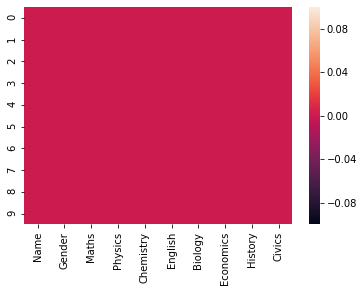

In [145]:
sns.heatmap(df.isnull())

In [146]:
df.isnull().sum()

Name         0
Gender       0
Maths        0
Physics      0
Chemistry    0
English      0
Biology      0
Economics    0
History      0
Civics       0
dtype: int64

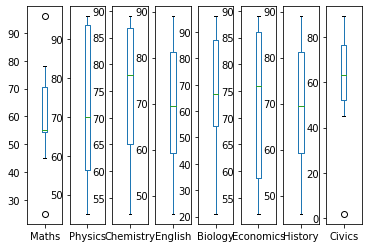

In [147]:
df.plot(kind='box',subplots= True)
plt.show()

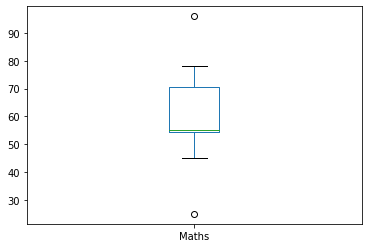

In [148]:
df['Maths'].plot.box()

In [149]:
df.skew()

Maths        0.246964
Physics     -0.045336
Chemistry   -0.746462
English     -0.131222
Biology     -0.496446
Economics   -0.245555
History     -0.131222
Civics      -1.332448
dtype: float64